In [1]:
from mcp_persor import BVHparser
from mcp_persor import plot
from matplotlib import pyplot as plt


In [2]:
def plot_pos(df):
    cmap = plt.get_cmap('viridis')
    norm = plt.Normalize(df['time'].min(), df['time'].max())
    fig, ax = plt.subplots()
    sc = ax.scatter(df['root_Xposition'], df['root_Zposition'], c=df['time'], cmap=cmap, norm=norm)
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('Time')

    for p in df[['time', 'root_Xposition', 'root_Yposition', 'root_Zposition']].itertuples():
        color = cmap(p[1] / df['time'].max())
        plt.plot(p[2], p[4], marker='.', color=color)
    plt.show()


In [3]:
bvhp = BVHparser('bvh/mocopi-move.bvh')
motion_df = bvhp.get_motion_df()

bvhp.get_joints()


dict_keys(['root', 'torso_1', 'torso_2', 'torso_3', 'torso_4', 'torso_5', 'torso_6', 'torso_7', 'neck_1', 'neck_2', 'head', '_End_head', 'l_shoulder', 'l_up_arm', 'l_low_arm', 'l_hand', '_End_l_hand', 'r_shoulder', 'r_up_arm', 'r_low_arm', 'r_hand', '_End_r_hand', 'l_up_leg', 'l_low_leg', 'l_foot', 'l_toes', '_End_l_toes', 'r_up_leg', 'r_low_leg', 'r_foot', 'r_toes', '_End_r_toes'])

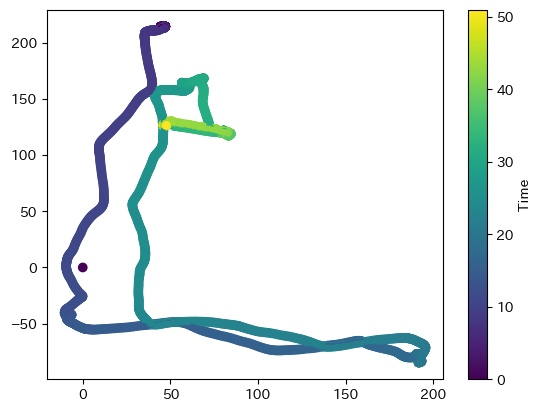

In [4]:
plot_pos(motion_df)


In [5]:
joint_name = 'r_low_leg'
relative_motion_df = bvhp.get_joint_motion_df(joint_name, mode='relative')
absolute_motion_df = bvhp.get_joint_motion_df(joint_name, mode='absolute')


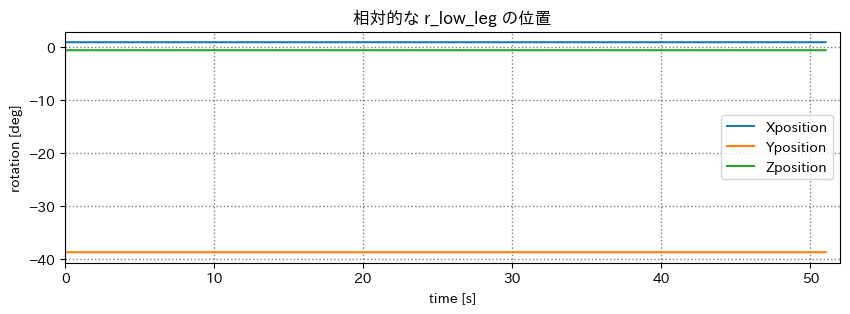

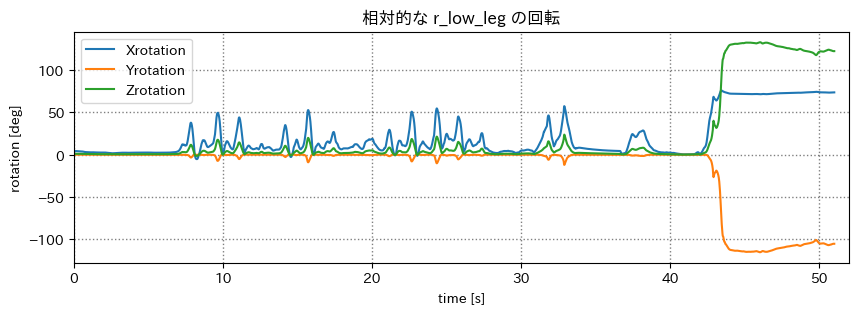

In [6]:
xlim = (0, 52)
ylim = (0, 0)

plot(
    df=relative_motion_df,
    heads=[
        ['time', 'Xposition'],
        ['time', 'Yposition'],
        ['time', 'Zposition']
    ],
    title=f'相対的な {joint_name} の位置',
    xlabel='time [s]',
    ylabel='rotation [deg]',
    xlim=xlim,
    ylim=ylim,
    grid=True,
)

plot(
    df=relative_motion_df,
    heads=[
        ['time', 'Xrotation'],
        ['time', 'Yrotation'],
        ['time', 'Zrotation']
    ],
    title=f'相対的な {joint_name} の回転',
    xlabel='time [s]',
    ylabel='rotation [deg]',
    xlim=xlim,
    ylim=ylim,
    grid=True,
)
